In [30]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#Data laoding
data = pd.read_csv('data/california_housing_train.csv')


In [32]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [34]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [35]:
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


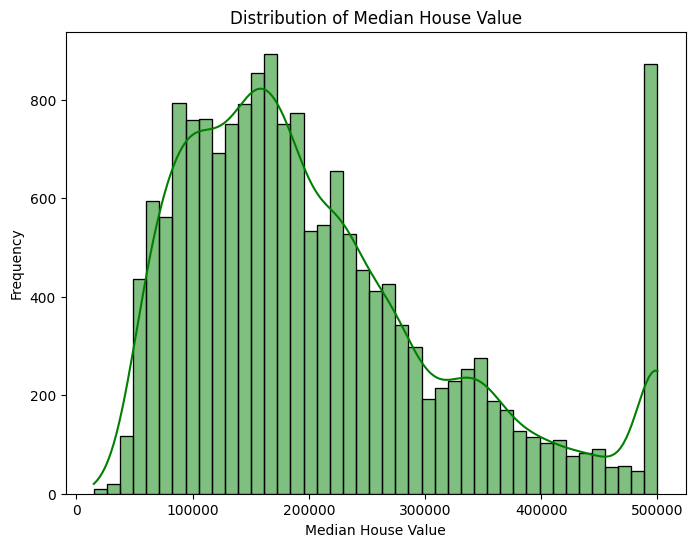

In [36]:
plt.figure(figsize=(8,6))
sns.histplot(data['median_house_value'], kde=True, color='Green')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

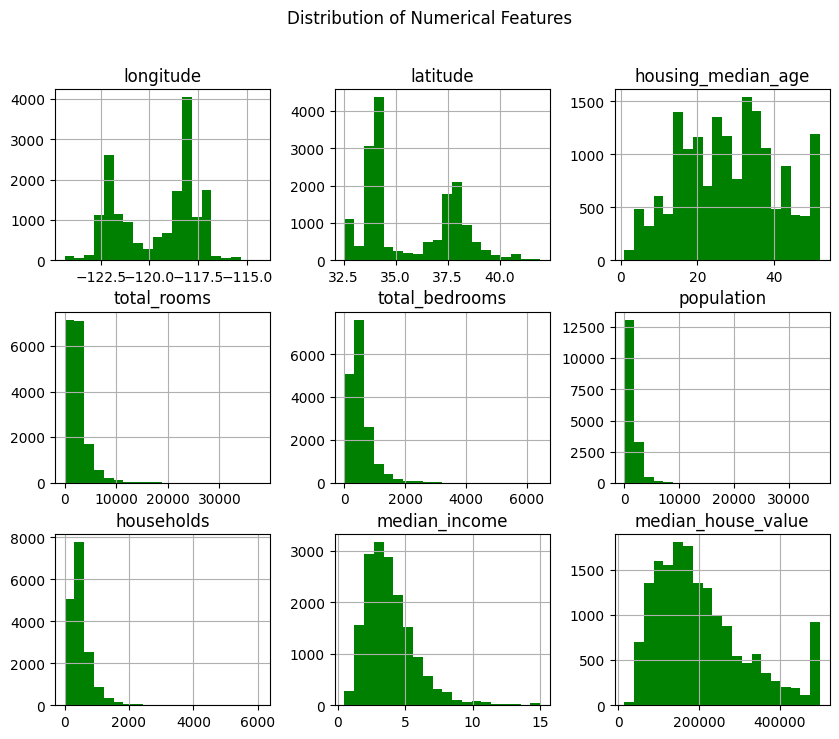

In [37]:
numerical_features = data.select_dtypes(include=[np.number]).columns
data[numerical_features].hist(figsize=(10, 8), bins=20,color='Green')
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [70]:
#importing libraries  for model building and testing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import mlflow
# from mlflow.models.signature import infer_signature

Linear Regression From scratch

In [48]:
import numpy as np

class LRfromScratch:

  def  __init__(self, learning_rate=0.01, epochs=1000, penalty=None, alpha=0.01):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.penalty = penalty # 'l1' for Lasso ,  'l2' for Ridge,  None for no penalty
    self.alpha = alpha
    self.w = None  # weight
    self.b = None  #bias

  def predict(self,X):
    return np.dot(X,self.w)+self.b

  def fit(self, X,y ):
    n,d =X.shape
    self.w = np.zeros(d)
    self.b = 0

    for _ in range(self.epochs ):
      y_pred = np.dot(X, self.w) + self.b

      dw = - (2 * (np.dot(X.T, (y-y_pred)))/n) # -2ex
      db = - (2 * ( np.sum(y-y_pred))/n)  #-2e

      if self.penalty == 'l1' :
        dw += self.alpha * np.sign(self.w)
      elif self.penalty =='l2':
        dw += 2* self.alpha * self.w

      self.w  -=self.learning_rate*dw
      self.b  -= self.learning_rate*db


In [49]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, single feature
y = 3 * X.squeeze() + 4 + np.random.randn(100)  # y = 3X + 4 + noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LRfromScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

In [51]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("r2_score:" , r2_score(y_test, y_pred) )

Mean Squared Error: 0.6568110458910411
r2_score: 0.9923148658680544


In [56]:
# mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Local MLflow server
mlflow.set_experiment("california_housing_train")


2025/03/26 02:47:26 INFO mlflow.tracking.fluent: Experiment with name 'california_housing_train' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/387434917338728303', creation_time=1742937446789, experiment_id='387434917338728303', last_update_time=1742937446789, lifecycle_stage='active', name='california_housing_train', tags={}>

In [69]:
alpha = 0.3
l1_ratio = 0.5
with mlflow.start_run():
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    lr.fit(X_train, y_train)
    
    #prediction
    y_pred = lr.predict(X_test)

    print(y_pred)
    # #Evaluation 
    mse = mean_squared_error(y_test, y_pred)
    r2_value = r2_score(y_test, y_pred)  # Use a different variable name

    mlflow.log_param("l1_ratio", l1_ratio )
    mlflow.log_param("alpha", alpha)
    mlflow.log_metric("mse", mse )
    mlflow.log_metric("r2_score", r2_value )
    mlflow.sklearn.log_model(sk_model=model,
                            artifact_path="model",
                            input_example=X_train)

[ 6.30253385 30.33494434 26.79101944 23.61888648 11.94649072 17.19006249
 12.91108024 29.41778951  5.06013777 15.29317529 16.9527802  22.02946088
 28.04043508 31.89779408  7.92256015  8.97560796 26.76284839  6.60569817
 28.53137059  9.39496888]
🏃 View run painted-vole-550 at: http://127.0.0.1:5000/#/experiments/387434917338728303/runs/a3375914c98d4eabaa3456227e037ed4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/387434917338728303
